# 0. Data preparation
#### (see first notebook)

In [1]:
#Basic imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load in lung cancer datasets
data = pd.read_csv("lung_cancer_data.csv")

In [3]:
#Create dummy variables (see first notebook)
data_no_cat = data.copy()

#Clean so 1 is YES and 0 is NO.
#First replace all 1s by 0s (ok as AGE has min values>>1)
data_no_cat.replace({1:0},inplace=True)

#Now replace all 2s by 1s
data_no_cat.replace({2:1},inplace=True)

#Now create dummy variable for GENDER and LUNG_CANCER
data_no_cat=pd.get_dummies(data_no_cat,drop_first=True)

Previously, we hypothesized that older men were more at risk of lung cancer. However, does this suggest that at birth, men will be more prone to lung cancer later in their life?

To answer this question, we will start by exploring how men and women are socialized differently.

In this notebook, we will explore the links between gender and social behaviours like smoking and drinking. This will help us establish in more detail what factors are truly increasing lung cancer risk.


# I. Exploring social behaviours

Let's first explore the correlations between gender and other social behaviours.

In [7]:
data_no_cat.corr().GENDER_M.sort_values()

PEER_PRESSURE           -0.275564
YELLOW_FINGERS          -0.212959
CHRONIC DISEASE         -0.204606
ANXIETY                 -0.152127
FATIGUE                 -0.083560
SWALLOWING DIFFICULTY   -0.078161
SHORTNESS OF BREATH     -0.064911
AGE                      0.021306
SMOKING                  0.036277
LUNG_CANCER_YES          0.067254
COUGHING                 0.133303
WHEEZING                 0.141207
ALLERGY                  0.154251
CHEST PAIN               0.362958
ALCOHOL CONSUMING        0.454268
GENDER_M                 1.000000
Name: GENDER_M, dtype: float64

Before focusing on social behaviours, let's note that lung cancer only has a very small correlation with gender. While this might contradict our previous work, this could also be because the relation between gender and lung cancer is not linear. Moreover, there might be some social behaviours that are highly correlated to both gender and lung cancer.

But let's go back to our data now.

We can observe that the largest positive correlation (other than GENDER_M) is of around 0.45 for alcohol consumption. It can be deduced that men tend to drink much more alcohol than women.

While one might think that this is due to peer-pressure, we can note that the largest negative correlation is in fact peer_pressure. This would imply that men are heavier alcohol drinkers for reasons other than peer-pressure. Although this observation is based off our dataset, it turns out that the scientific community does agree with the fact that women, especially younger girls feel more peer-pressured:


https://www.waldegrave.richmond.sch.uk/2402/peer-pressure-what-it-is-what-it-does-and-why-girls-experience-it-more-than-boys

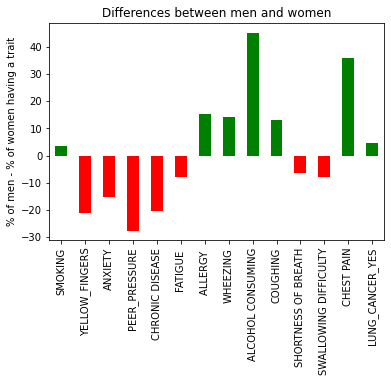

In [19]:
#Traits of interest split by gender
gender_diff= data_no_cat.groupby('GENDER_M').mean()[['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER_YES']]
fem = gender_diff.iloc[0]
male = gender_diff.iloc[1]
comp_df = pd.merge(fem, male, left_index=True, right_index=True)
comp_df.columns = ['Female', 'Male']
comp_df['Diff_F_M'] = (comp_df['Male'] - comp_df['Female'])*100

color = ['r' if y<0 else 'g' for y in comp_df['Diff_F_M']]
comp_df['Diff_F_M'].plot(kind='bar', subplots=True, color=color, ylabel = '% of men - % of women having a trait')
plt.title('Differences between men and women')
plt.show();

Before analyzing this plot, recall that in each of these categorical features, 1 is a positive while 0 is a negative. The average value will correspond to a value between 0 and 1. If we multiply this by 100, then the result corresponds to a % of the sample being positive.

This visualization reflects the correlations we have displayed above.

Let's focus on anxiety, peer-pressure and alcohol as these are top differences between genders that relate to behaviours more than physical symptoms. We will consider smoking as well, but with less focus.

# II. Effect of social behaviours on lung cancer

We know that men are heavier drinkers while women are more prone to anxiety and peer-pressure. Let's see how these behaviours correlate and how they relate to cancer.

## 1) Men

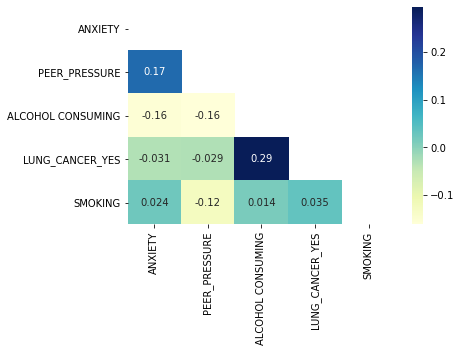

In [93]:
socialb_m = data_no_cat[data_no_cat['GENDER_M']==1][[ 'ANXIETY', 'PEER_PRESSURE',
       'ALCOHOL CONSUMING','LUNG_CANCER_YES', 'SMOKING']]
# creating mask
mask = np.triu(np.ones_like(socialb_m.corr()))
 
# plotting a triangle correlation heatmap
sns.heatmap(socialb_m.corr(), cmap="YlGnBu", annot=True, mask=mask);

Here we note that the biggest social factor affecting men's lung cancer is alcohol consumption.

The second biggest correlation is between peer-pressure and anxiety. However, neither of the two seem to strongly positively correlated to lung cancer.

We can conclude that the biggest social behaviour affecting lung cancer for men is alcohol.

How does this compare to women, who consume less alcohol?

## 2) Women

<AxesSubplot:>

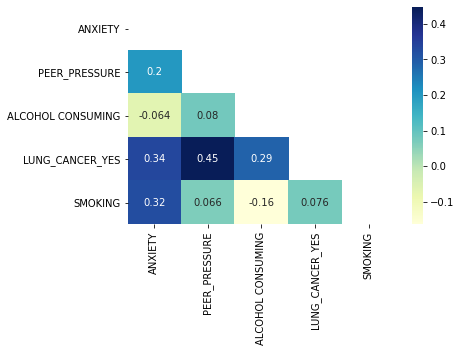

In [92]:
socialb_f = data_no_cat[data_no_cat['GENDER_M']==0][[ 'ANXIETY', 'PEER_PRESSURE',
       'ALCOHOL CONSUMING','LUNG_CANCER_YES', 'SMOKING']]

# creating mask
mask = np.triu(np.ones_like(socialb_f.corr()))
 
# plotting a triangle correlation heatmap
sns.heatmap(socialb_f.corr(), cmap="YlGnBu", annot=True, mask=mask)


This correlation matrix is interesting to compare to the men's as it doesn't have a single stand-out social behaviour related to lung cancer. Indeed, anxiety, alcohol and peer-pressure are all highly correlated to it.

One interesting other thing to note is the high correlation between anxiety and smoking, and anxiety and lung cancer. Indeed, so far, smoking hasn't stood out significantly as a feature. However, we would expect smoking to be one of the first causes of lung cancer. By making the relation between anxiety and smoking, we could make the hypothesis that anxious women who tend to smoke, are more prone to lung cancer.

# III. Can we now predict lung cancer?

We've established that older men who drink alcohol are more at risk. In contrast, for women, who tend to consume less alcohol, anxiety, peer-pressure (and smoking) also play an important role in understanding lung cancer.

Although we've chosen to focus on comparing men and women's social behaviours, our dataset also has a lot of information on physical symptoms that could be indicative of lung cancer. In the next notebook, we will try reintroducing those to predict whether an individual has cancer or not.